# Função_ClassSelection_ImagePatches

## Seleção de classes baseado nas anotações do BreCaHAD

### A função ClassSelection() divide as imagens do BreCaHAD em patches e os classifica em 'malignant' e 'non_malignant' com base nas anotações feitas por especialistas.

In [2]:
from wand.image import Image
import os
from empatches import EMPatches
import imgviz 
import json

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

42


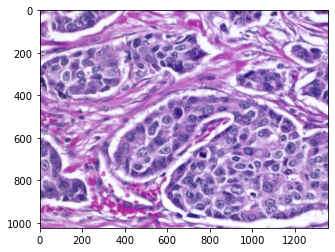

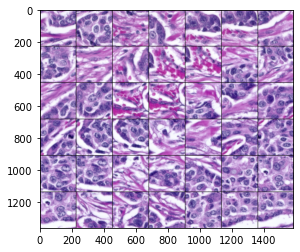

In [39]:
# get image either RGB or Grayscale
img = cv.imread('BreCaHAD_test/dataset/malignant/Case_1-01.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
# load module
emp = EMPatches()
img_patches, indices = emp.extract_patches(img, patchsize=224, overlap=0.15)

# displaying 1st 10 image patches
tiled= imgviz.tile(list(map(np.uint8, img_patches[0:])),border=(0,0,0))
plt.figure()
plt.imshow(tiled)

print(len(img_patches))

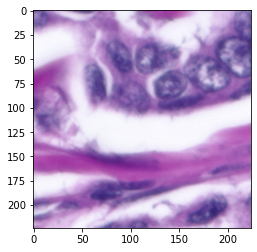

In [40]:
plt.figure()
plt.imshow(img_patches[0])

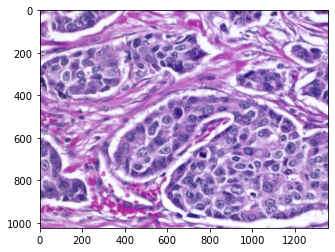

In [4]:
merged_img = emp.merge_patches(img_patches, indices)
# display
plt.figure()
plt.imshow(merged_img.astype(np.uint8))

42


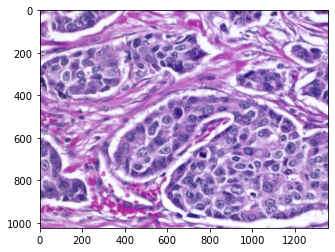

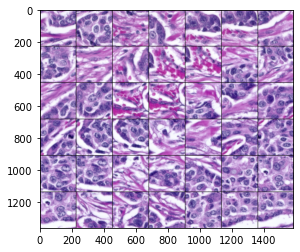

In [6]:
# get image either RGB or Grayscale
img = cv.imread('BreCaHAD_test/dataset/malignant/Case_1-01.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
# load module
emp = EMPatches()
img_patches2, indices2 = emp.extract_patches(img, patchsize=224, overlap=0.15)

# displaying 1st 10 image patches
tiled= imgviz.tile(list(map(np.uint8, img_patches2[0:])),border=(0,0,0))
plt.figure()
plt.imshow(tiled)

print(len(img_patches2))

In [7]:
np.array_equal(indices, indices2)

True

In [8]:
np.array_equal(img_patches, img_patches2)

True

In [9]:
img.shape

(1024, 1360, 3)

In [10]:
arr = np.zeros((1024, 1360, 3))

In [3]:
'''def gettumor2(name, formato=".json", filen="BreCaHAD_test/groundTruth/"):

    item = name.split('.')[0]
    
    f = open(filen+item+formato)
    data = json.load(f)

    annot = []
    for _, points in enumerate(data['tumor']):
        values_i_j = []

        values_i_j.append(int(points['x']*1360))
        values_i_j.append(int(points['y']*1024))

        annot.append(values_i_j)

    f.close()
    
    matannot = np.zeros((1024, 1360))
    for ind in range(0,len(annot)):
        x = annot[ind][0]
        y = annot[ind][1]
        matannot[y][x] = 255.0 # linhas x colunas - y x
    
    empan = EMPatches()
    img_patchsan, indicesan = empan.extract_patches(matannot, patchsize=224, overlap=0.15)
    
    tumorid = []
    nontumorid = []
    for i in range(0,len(img_patchsan)):
        if np.count_nonzero(img_patchsan[i])!=0:
            tumorid.append(i)
        else:
            nontumorid.append(i)
            
            
    return tumorid, nontumorid'''

In [3]:
def annotTruth(img_patchsani, auxnamejson, newgroundTruth):
    
    dic = {
            "tumor":[]
    }
    
    newannot = np.where(img_patchsani==255.0) # retorna dois arrays - o primeiro é a linha o segundo é a coluna
    
    for i in range(0,len(newannot[0])):
        x = newannot[1][i]/1360
        y = newannot[0][i]/1024
        dic["tumor"].append({"x":x,"y":y})
    
    json_object = json.dumps(dic, indent=2)
    
    try:
        f = open(newgroundTruth + auxnamejson, "x")
        f.close()
    except:None
        
    with open(newgroundTruth + auxnamejson, "w") as outfile:
        outfile.write(json_object)
    

In [8]:
def gettumor(name, newgroundTruth, formato=".json", filen="BreCaHAD_test/groundTruth/"):

    item = name.split('.')[0]
    
    f = open(filen+item+formato)
    data = json.load(f)

    annot = []
    for _, points in enumerate(data['tumor']):
        values_i_j = []

        values_i_j.append(int(points['x']*1360))
        values_i_j.append(int(points['y']*1024))

        annot.append(values_i_j)

    f.close()
    
    matannot = np.zeros((1024, 1360))
    for ind in range(0,len(annot)):
        x = annot[ind][0]
        y = annot[ind][1]
        matannot[y][x] = 255.0 # linhas x colunas - y x
    
    empan = EMPatches()
    img_patchsan, indicesan = empan.extract_patches(matannot, patchsize=224, overlap=0.15)
    
    tumorid = []
    nontumorid = []
    mlnames = []
    for i in range(0,len(img_patchsan)):
        if np.count_nonzero(img_patchsan[i])!=0:
            tumorid.append(i)
            auxname = 'malignant' + '/' + 'Patch_' + str(i) + '__' + name
            mlnames.append(auxname)
            '''         
            auxnamejson = 'Patch_' + str(i) + '__' + item + '.json'
            annotTruth(img_patchsan[i],auxnamejson,newgroundTruth)
            '''
        else:
            nontumorid.append(i)
    
    return tumorid, nontumorid, mlnames

In [9]:
def ClassSelection(imgfileIn, imgfileOut, newgroundTruth):
    walkdir = os.walk(imgfileIn, topdown=False)
    for root, dirs, files in walkdir:
        if len(files) != 0:
            print("Número de Imagens", "no diretório", root,":",len(files), "\n")
            count = 0
            for name in files:
                img = cv.imread(imgfileIn + name)
                img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
                count = count + 1
                
                tumorid, nontumorid, mlnames = gettumor(name, newgroundTruth)

                emp = EMPatches()
                img_patches, indices = emp.extract_patches(img, patchsize=224, overlap=0.15)
                
                j = 0
                for i in range(0,len(img_patches)):                    
                    if (i in tumorid):
                        xt = imgfileOut + mlnames[j]
                        cv.imwrite(xt, cv.cvtColor(img_patches[i], cv.COLOR_RGB2BGR))
                        j = j + 1
                    else:
                        xnt = imgfileOut + 'non_malignant' + '/' + 'Patch_' + str(i) + '__' + name
                        #cv.imwrite(xnt, cv.cvtColor(img_patches[i], cv.COLOR_RGB2BGR))

                print("Img",count,"- Patches Finalizado","\n")
    

In [10]:
ClassSelection('out/groundTruth_display/', 'out/patches_groundTruth_display/', 'out/temp/')

Número de Imagens no diretório out/groundTruth_display/ : 159 

Img 1 - Patches Finalizado 

Img 2 - Patches Finalizado 

Img 3 - Patches Finalizado 

Img 4 - Patches Finalizado 

Img 5 - Patches Finalizado 

Img 6 - Patches Finalizado 

Img 7 - Patches Finalizado 

Img 8 - Patches Finalizado 

Img 9 - Patches Finalizado 

Img 10 - Patches Finalizado 

Img 11 - Patches Finalizado 

Img 12 - Patches Finalizado 

Img 13 - Patches Finalizado 

Img 14 - Patches Finalizado 

Img 15 - Patches Finalizado 

Img 16 - Patches Finalizado 

Img 17 - Patches Finalizado 

Img 18 - Patches Finalizado 

Img 19 - Patches Finalizado 

Img 20 - Patches Finalizado 

Img 21 - Patches Finalizado 

Img 22 - Patches Finalizado 

Img 23 - Patches Finalizado 

Img 24 - Patches Finalizado 

Img 25 - Patches Finalizado 

Img 26 - Patches Finalizado 

Img 27 - Patches Finalizado 

Img 28 - Patches Finalizado 

Img 29 - Patches Finalizado 

Img 30 - Patches Finalizado 

Img 31 - Patches Finalizado 

Img 32 - Patche

In [9]:
ClassSelection("BreCaHAD_test/dataset/malignant/", "Patches_BreCaHAD_test/dataset_malignant_only/", "Patches_BreCaHAD_test/groundTruth_malignant_only/")

Número de Imagens no diretório BreCaHAD_test/dataset/malignant/ : 159 

Img 1 - Patches Finalizado 

Img 2 - Patches Finalizado 

Img 3 - Patches Finalizado 

Img 4 - Patches Finalizado 

Img 5 - Patches Finalizado 

Img 6 - Patches Finalizado 

Img 7 - Patches Finalizado 

Img 8 - Patches Finalizado 

Img 9 - Patches Finalizado 

Img 10 - Patches Finalizado 

Img 11 - Patches Finalizado 

Img 12 - Patches Finalizado 

Img 13 - Patches Finalizado 

Img 14 - Patches Finalizado 

Img 15 - Patches Finalizado 

Img 16 - Patches Finalizado 

Img 17 - Patches Finalizado 

Img 18 - Patches Finalizado 

Img 19 - Patches Finalizado 

Img 20 - Patches Finalizado 

Img 21 - Patches Finalizado 

Img 22 - Patches Finalizado 

Img 23 - Patches Finalizado 

Img 24 - Patches Finalizado 

Img 25 - Patches Finalizado 

Img 26 - Patches Finalizado 

Img 27 - Patches Finalizado 

Img 28 - Patches Finalizado 

Img 29 - Patches Finalizado 

Img 30 - Patches Finalizado 

Img 31 - Patches Finalizado 

Img 32 